### Creating images using smaller images
The idea is to use small scale images to draw a larger scale image by calculating the average color in a grid on the larger image then replace each grid element with a small image that best represents that average color.

#### How to use it
All you need to change are 3 variables:
* files: is an array that contains the locations of all the smaller scale images (that are automatically resized if they are large)
* image_to_draw: you need to change the location of the larger scale image
* grid_size: is how large the smaller scale images will be drawn in pixels. Their size will be (grid_size x grid_size)

In [1]:
import numpy as np
from glob import glob
import cv2     
import matplotlib.pyplot as plt                        
%matplotlib inline    

In [2]:
files = np.array(glob("dogImages/*/*/*")) # An array that contains the location of all images that will be used
print('There are %d total images.' % len(files))

def show_opencv_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

There are 8351 total images.


In [3]:
images_avgs = [] # Will contain the mean/average color for each image
for file in files:
    image_data = cv2.imread(file)
    avg = np.mean(image_data,axis=(0,1))
    images_avgs.append(avg)

In [4]:
from scipy import spatial
tree = spatial.KDTree(images_avgs)

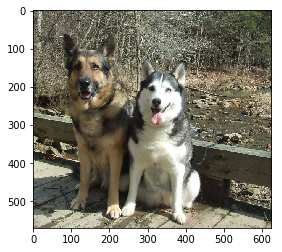

In [5]:
image_to_draw = cv2.imread('./myTests/2dogs.jpg') # Select the image that you want to recreate
show_opencv_image(image_to_draw)

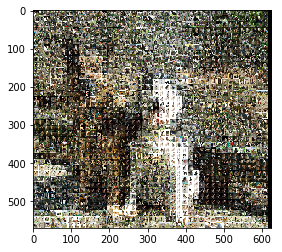

In [6]:
new_image = np.zeros_like(image_to_draw)
grid_size = 15 # Square size in the final image
for i in range(0,image_to_draw.shape[0]//grid_size):
    for j in range(0,image_to_draw.shape[1]//grid_size):
        small_section = image_to_draw[i*grid_size:(i+1)*grid_size,j*grid_size:(j+1)*grid_size]
        avg_value = np.mean(small_section,axis=(0,1))
        image_to_use_index = tree.query(avg_value)[1]
        image_to_use = cv2.imread(files[image_to_use_index])
        new_image[i*grid_size:(i+1)*grid_size,j*grid_size:(j+1)*grid_size] = cv2.resize(image_to_use, dsize=(grid_size, grid_size), interpolation=cv2.INTER_CUBIC)

show_opencv_image(new_image)